In [1]:
import pandas as pd

In [7]:
df=pd.read_csv("2023-2-Python/data/GlobalLandTemperatures/GlobalTemperatures.csv")

In [8]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [9]:
# data: https://github.com/DovarFalcone/global-temp-change-animation?tab=readme-ov-file
# from https://www.kaggle.com/datasets/mdazizulkabirlovlu/all-countries-temperature-statistics-1970-2021
# oil, https://ourworldindata.org/grapher/annual-change-oil

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import itertools
import numpy as np

In [11]:

spinner = itertools.cycle(['-', '/', '|', '\\'])

# Read the datasets
df = pd.read_csv('data/iso3change.csv')
world_temp = pd.read_csv('data/worldtemp.csv', index_col=0)

# Extract the world average change for each year
world_avg_change = world_temp.loc['world', df.columns[1:]].values

# Melt the dataframe to long format
df_melted = df.melt(id_vars=['iso3'], var_name='year', value_name='change_index')

# Read the world map shapefile using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/ipykernel_9130/1944858741.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [44]:
# Loop over each year and create the corresponding map
images = []
i=1
for year in df.columns[1:]:
    print(f"\r{next(spinner)} Running year {year}...", end="")
    # Merge the map with the dataset for the current year
    merged = world.merge(df_melted[df_melted['year']==year], left_on='iso_a3', right_on='iso3', how='left')
    
    # Plot the map for the current year
    fig, ax = plt.subplots(figsize=(10, 5), facecolor='#2c2c2c')
    merged.plot(column='change_index', cmap='coolwarm', edgecolor='grey',vmin=-2, vmax=2, ax=ax)
    
    # Get the current world average temperature change for the year
    world_avg_temp = world_temp.loc['world', year]    
    
    ax.axis('off')
    ax.set_title(f'Global Surface Temperature Change ({year}), Increse: {world_avg_temp:.2f} ºC', color='white')
    # Add color bar to the plot
    cax = fig.add_axes([0.2, 0.15, 0.6, 0.02]) # [left, bottom, width, height]
    im = ax.collections[0]
    cb = plt.colorbar(im, cax=cax, orientation='horizontal', label='Global Average Change')
    cb.ax.xaxis.label.set_color('white')  # set the color of the label to white
    cb.ax.tick_params(colors='white')
    
    # Add a marker on the color bar for the world average temperature change
    cb.ax.plot([world_avg_temp], [1.5], 'v', color='grey', markeredgecolor='black', markersize=20)
    #map_for_date.plot(column='value', cmap='coolwarm', linewidth=0.1, 
    #              ax=ax, edgecolor='grey', legend=True, vmin=-25, 
    #              vmax=35, missing_kwds={'color': 'lightgrey', 'hatch': '///'})

    
    cb.ax.axvline(world_avg_temp, color='black', lw=1.5)
    cb.ax.annotate(f'{world_avg_temp:.2f}', xy=(world_avg_temp, 1.5), xytext=(world_avg_temp, 1.7),
                   fontsize=8, ha='center', va='center',
                   arrowprops=dict(arrowstyle='->', color='black', lw=0.5))
    
    # Set the title below the color bar
    plt.suptitle(f'Celsius', fontsize=8, y=0.05, color='white')
    
    # Save the map as an image file
    filename = f'./images/{year}.png'
    plt.savefig(filename, dpi=300)
    images.append(imageio.imread(filename))
    plt.close()
    i+=1
# Create the animated gif from the images

/ Running year 2021...

In [45]:
%time
# Create the animated gif from the images
imageio.mimsave('./gif/temperature_change_FINAL.gif', images, fps=1.75)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


<img src="./gif/temperature_change_FINAL.gif" width="750" align="center">

In [48]:
temp_df=world_temp.T

In [72]:
temp_df.rename(columns={'world':'change'},inplace=True)

In [ ]:
temp_df['sign']=np.sign(temp_df['change'].diff())

In [149]:
temp_df.fillna(1,inplace=True)

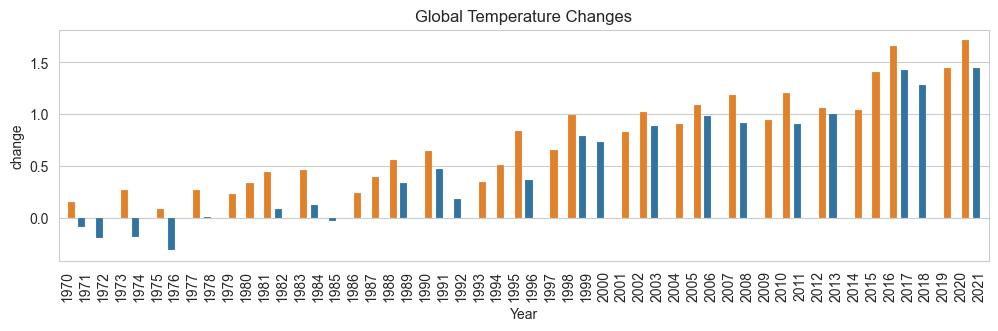

In [183]:
import seaborn as sns

plt.subplots(figsize=(12, 3))
plt.xticks(rotation=90)
ax=sns.barplot(data=temp_df,x=temp_df.index, y="change", hue='sign',linewidth=0.1).set(title='Global Temperature Changes')
plt.legend('', frameon=False);

In [154]:
df_oil=pd.read_csv("data/annual-change-oil.csv")

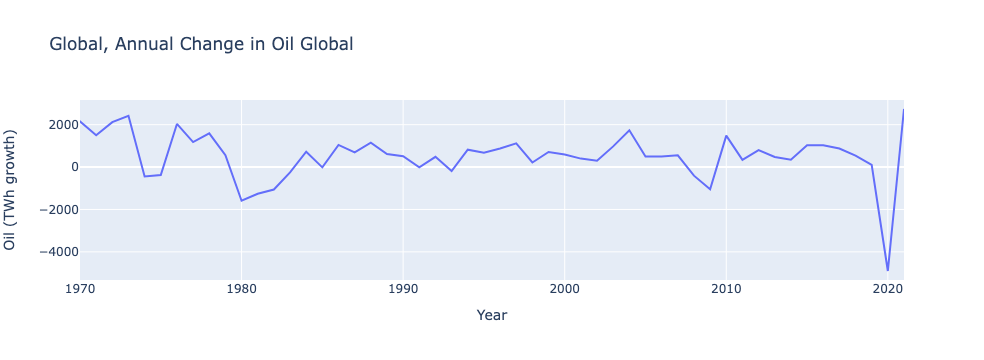

In [167]:
import pandas as pd
import plotly.graph_objects as go


df_oil=pd.read_csv("data/annual-change-oil.csv")
world_df = df_oil[df_oil['Entity'] == 'World']

# Create the Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=world_df['Year'], y=world_df['Oil (TWh growth)']))

# Update the layout
fig.update_layout(
    title=' Global, Annual Change in Oil Global',
    xaxis_title='Year',
    yaxis_title='Oil (TWh growth)',
    xaxis_range=[1970, 2021]
)

# Display the plot
fig.show()

In [162]:
df_oil[df_oil['Entity'] == 'W']

,Entity,Code,Year,Oil (TWh growth)


In [163]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            5609 non-null   object 
 1   Code              4298 non-null   object 
 2   Year              5609 non-null   int64  
 3   Oil (TWh growth)  5609 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 175.4+ KB


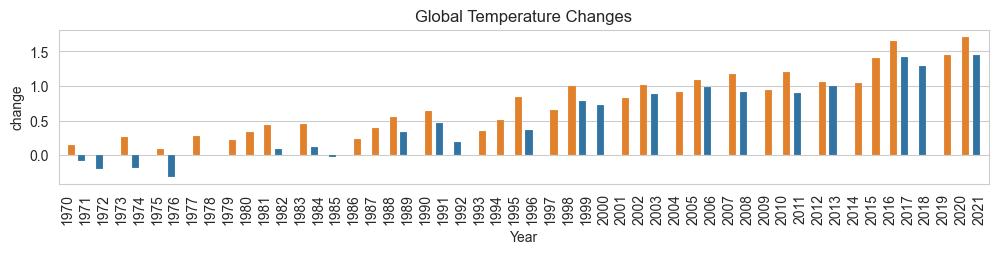

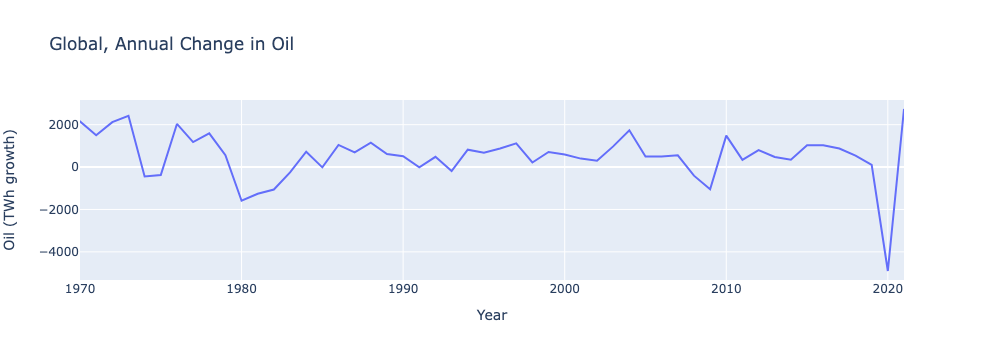

In [203]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Load the oil data
df_oil = pd.read_csv("data/annual-change-oil.csv")

# Filter the data for the 'World' entity
world_df = df_oil[df_oil['Entity'] == 'World']

# Create the Plotly figure for oil
fig_oil = go.Figure()
fig_oil.add_trace(go.Scatter(x=world_df['Year'], y=world_df['Oil (TWh growth)']))

# Update the layout for oil
fig_oil.update_layout(
    title='Global, Annual Change in Oil',
    xaxis_title='Year',
    yaxis_title='Oil (TWh growth)',
    xaxis_range=[1970, 2021]
)

# Load the temperature data


# Create the Seaborn barplot for temperature
plt.subplots(figsize=(12, 2))
plt.xticks(rotation=90)
sns.barplot(data=temp_df,x=temp_df.index, y="change", hue='sign',linewidth=0.1).set(title='Global Temperature Changes')
plt.legend('', frameon=False);
plt.show()

# Display the oil plot
fig_oil.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
temp_df['Oil (TWh growth)']=world_df[world_df['Entity']=='World'][-53:-1]['Oil (TWh growth)'].values

In [ ]:
xlabels=np.linspace(1970,2022,53).astype(int)
# 1. Remove the first digits for each year, except 2000
modified_xlabels = [str(x)[-2:] if x != 2000 else '00' for x in xlabels]

# 2. Replace with '' if the year cannot be divided by 5
modified_xlabels = [str(x) if x % 5 == 0 else '' for x in xlabels]
modified_xlabels[:-1]

/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/ipykernel_9130/1482016900.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



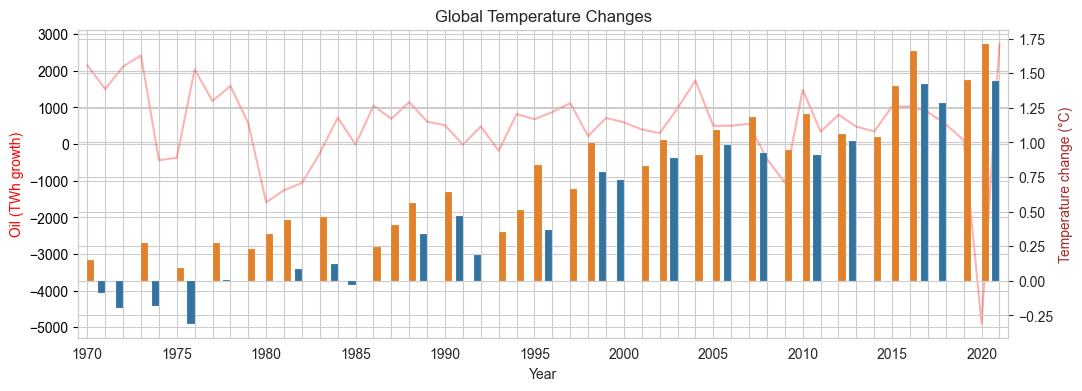

In [288]:

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 4))
plt.title('Global Temperature Changes')
# Plot the oil data
sns.lineplot(data= temp_df, x='Year', y='Oil (TWh growth)', ax=ax1,color='red',alpha=0.3)
#ax1.set_xlabel('Year')
ax1.set_ylabel('Oil (TWh growth)', color='red')
ax1.tick_params('y', colors='black')

# Create the secondary y-axis for the temperature data
ax2 = ax1.twinx()

# Plot the temperature data
#ax2.set_label('Year')

ax2.set_xticklabels(modified_xlabels[:-1], rotation=90)
#fig.set_xticklabels(temp_df.index.values, rotation=45, ha='right')

ax2=sns.barplot(data=temp_df,x=temp_df.index, y="change", hue='sign',linewidth=0.1)
plt.legend('', frameon=False);
#sns.barplot(data=temp_df, x=temp_df.index, y="change", hue='sign', linewidth=0.1, ax=ax2, color='orange')
ax2.set_ylabel('Temperature change (°C)', color='brown')
#ax2.tick_params('y', colors='orange')
ax2.set_xticklabels(modified_xlabels[:-1], color='red')
plt.show()

In [261]:
temp_df.corr()

world,change,sign,Oil (TWh growth)
world,,,
change,1.000000,0.252351,-0.183764
sign,0.252351,1.000000,-0.145812
Oil (TWh growth),-0.183764,-0.145812,1.000000


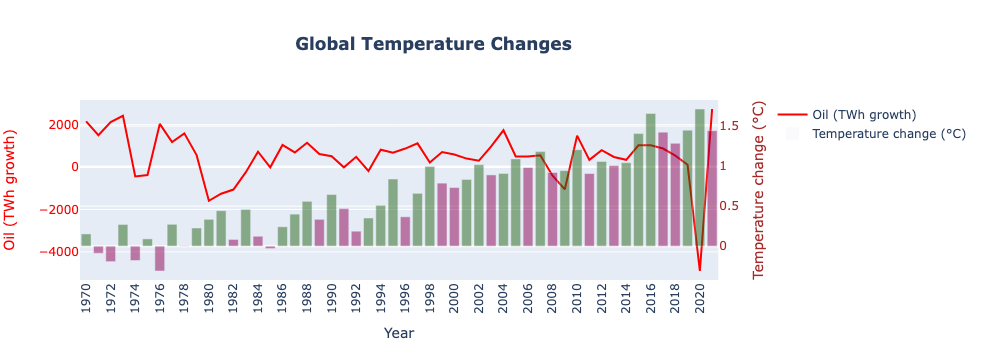

In [322]:
from plotly.subplots import make_subplots

# Assuming the data is in a Pandas DataFrame called 'temp_df'
#fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Create the left y-axis
lx = list(temp_df.index)
fig.add_trace(go.Scatter(x=lx, y=temp_df['Oil (TWh growth)'], mode='lines', line=dict(color='red', width=2,), name='Oil (TWh growth)'),
    secondary_y=False,)

# Create the right y-axis
fig.add_trace(go.Bar(x=lx, y=temp_df['change'], name='Temperature change (°C)', opacity=0.5,
                     marker=dict(color=temp_df['sign'])), secondary_y=True)


fig.update_yaxes(title_text="Oil (TWh growth)", color='red',  secondary_y=False)
fig.update_yaxes(title_text="Temperature change (°C)", color='brown', secondary_y=True)

# Set the title and x-axis label
fig.update_layout(
    title='<b>Global Temperature Changes</b>',
    title_x=0.3,
    xaxis_title='Year',
    xaxis_tickangle=-90
)
#fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
#fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)
# Display the plot
fig.show()